In [89]:
import pandas as pd
file_path = 'ball_by_ball_it20.csv'
data = pd.read_csv(file_path)
data.head()
data.columns
data.Winner.unique()

KeyboardInterrupt: 

In [ ]:
import pandas as pd

# Load the dataset
file_path = 'ball_by_ball_it20.csv'
data = pd.read_csv(file_path)

second_inning_data = data[data['Innings'] == 2]
second_inning_data = second_inning_data.drop(columns=['Date'], axis = 1)

# List of teams to keep
teams_to_keep = ["India", "Australia", "England","Pakistan","West Indies","South Africa","Sri Lanka","Bangladesh"]  

# Filter the dataset
filtered_data = second_inning_data[
    (second_inning_data['Bat First'].isin(teams_to_keep)) & 
    (second_inning_data['Bat Second'].isin(teams_to_keep))
]

#filling null values with necessary values
second_inning_data['Player Out Runs'].fillna(0, inplace=True)
second_inning_data['Player Out Balls Faced'].fillna(0, inplace=True)


# Save the filtered dataset
filtered_file_path = 'second_inning_data.csv'
filtered_data.to_csv(filtered_file_path, index=False)

print(f"Filtered dataset saved to: {filtered_file_path}")


Filtered dataset saved to: second_inning_data.csv


In [ ]:
#filling null values with necessary values
second_inning_data['Player Out Runs'].fillna(0, inplace=True)
second_inning_data['Player Out Balls Faced'].fillna(0, inplace=True)


# Save the filtered dataset
filtered_file_path = 'second_inning_data.csv'
filtered_data.to_csv(filtered_file_path, index=False)

print(f"Filtered dataset saved to: {filtered_file_path}")


Filtered dataset saved to: second_inning_data.csv


In [ ]:
# Calculate additional features
second_inning_data['current_run_rate'] = second_inning_data['Innings Runs'] / second_inning_data['Over']
epsilon = 1e-6  # Small value to prevent division by zero
second_inning_data['required_run_rate'] = (second_inning_data['Target Score'] - second_inning_data['Innings Runs']) / (20 - second_inning_data['Over'] + epsilon)

second_inning_data['wickets_remaining'] = 10 - second_inning_data['Innings Wickets'] 

# Verify the new features
print(second_inning_data[['current_run_rate', 'required_run_rate', 'wickets_remaining']].head())


     current_run_rate  required_run_rate  wickets_remaining
124               4.0          13.421052                 10
125               8.0          13.210526                 10
126               8.0          13.210526                 10
127               8.0          13.210526                 10
128               9.0          13.157894                 10


In [ ]:
 # List of categorical columns to encode
categorical_columns = ['Venue','Bat First', 'Bat Second', 'Batter','Non Striker','Bowler','Extra Type','Method','Player Out','Winner'] 

encoded_data = pd.get_dummies(second_inning_data, columns=categorical_columns)

# first few rows of the transformed dataset
print(encoded_data.head())



     Unnamed: 0  Match ID  Innings  Over  Ball  Batter Runs  Extra Runs  \
124         124   1339605        2     1     1            4           0   
125         125   1339605        2     1     2            4           0   
126         126   1339605        2     1     3            0           0   
127         127   1339605        2     1     4            0           0   
128         128   1339605        2     1     5            1           0   

     Runs From Ball  Ball Rebowled  Wicket  ...  Winner_Switzerland  \
124               4              0       0  ...               False   
125               4              0       0  ...               False   
126               0              0       0  ...               False   
127               0              0       0  ...               False   
128               1              0       0  ...               False   

     Winner_Tanzania  Winner_Thailand  Winner_Turkey  Winner_Uganda  \
124            False            False          Fals

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize label encoder
label_encoder = LabelEncoder()

# Encode categorical columns
for col in categorical_columns:
    second_inning_data[col] = label_encoder.fit_transform(second_inning_data[col])

# transformed data
print(second_inning_data.head())


     Unnamed: 0  Match ID  Venue  Bat First  Bat Second  Innings  Over  Ball  \
124         124   1339605    151         94          79        2     1     1   
125         125   1339605    151         94          79        2     1     2   
126         126   1339605    151         94          79        2     1     3   
127         127   1339605    151         94          79        2     1     4   
128         128   1339605    151         94          79        2     1     5   

     Batter  Non Striker  ...  Total Non Striker Runs  Batter Balls Faced  \
124    1736         1793  ...                       0                   1   
125    1736         1793  ...                       0                   2   
126    1736         1793  ...                       0                   3   
127    1736         1793  ...                       0                   4   
128    1736         1793  ...                       0                   5   

     Non Striker Balls Faced  Player Out Runs  Player Ou

In [ ]:
# Save to CSV
encoded_file_path = 'encoded_second_inning_data.csv'
second_inning_data.to_csv(encoded_file_path, index=False)
print(f"Encoded data saved to: {encoded_file_path}")


Encoded data saved to: encoded_second_inning_data.csv


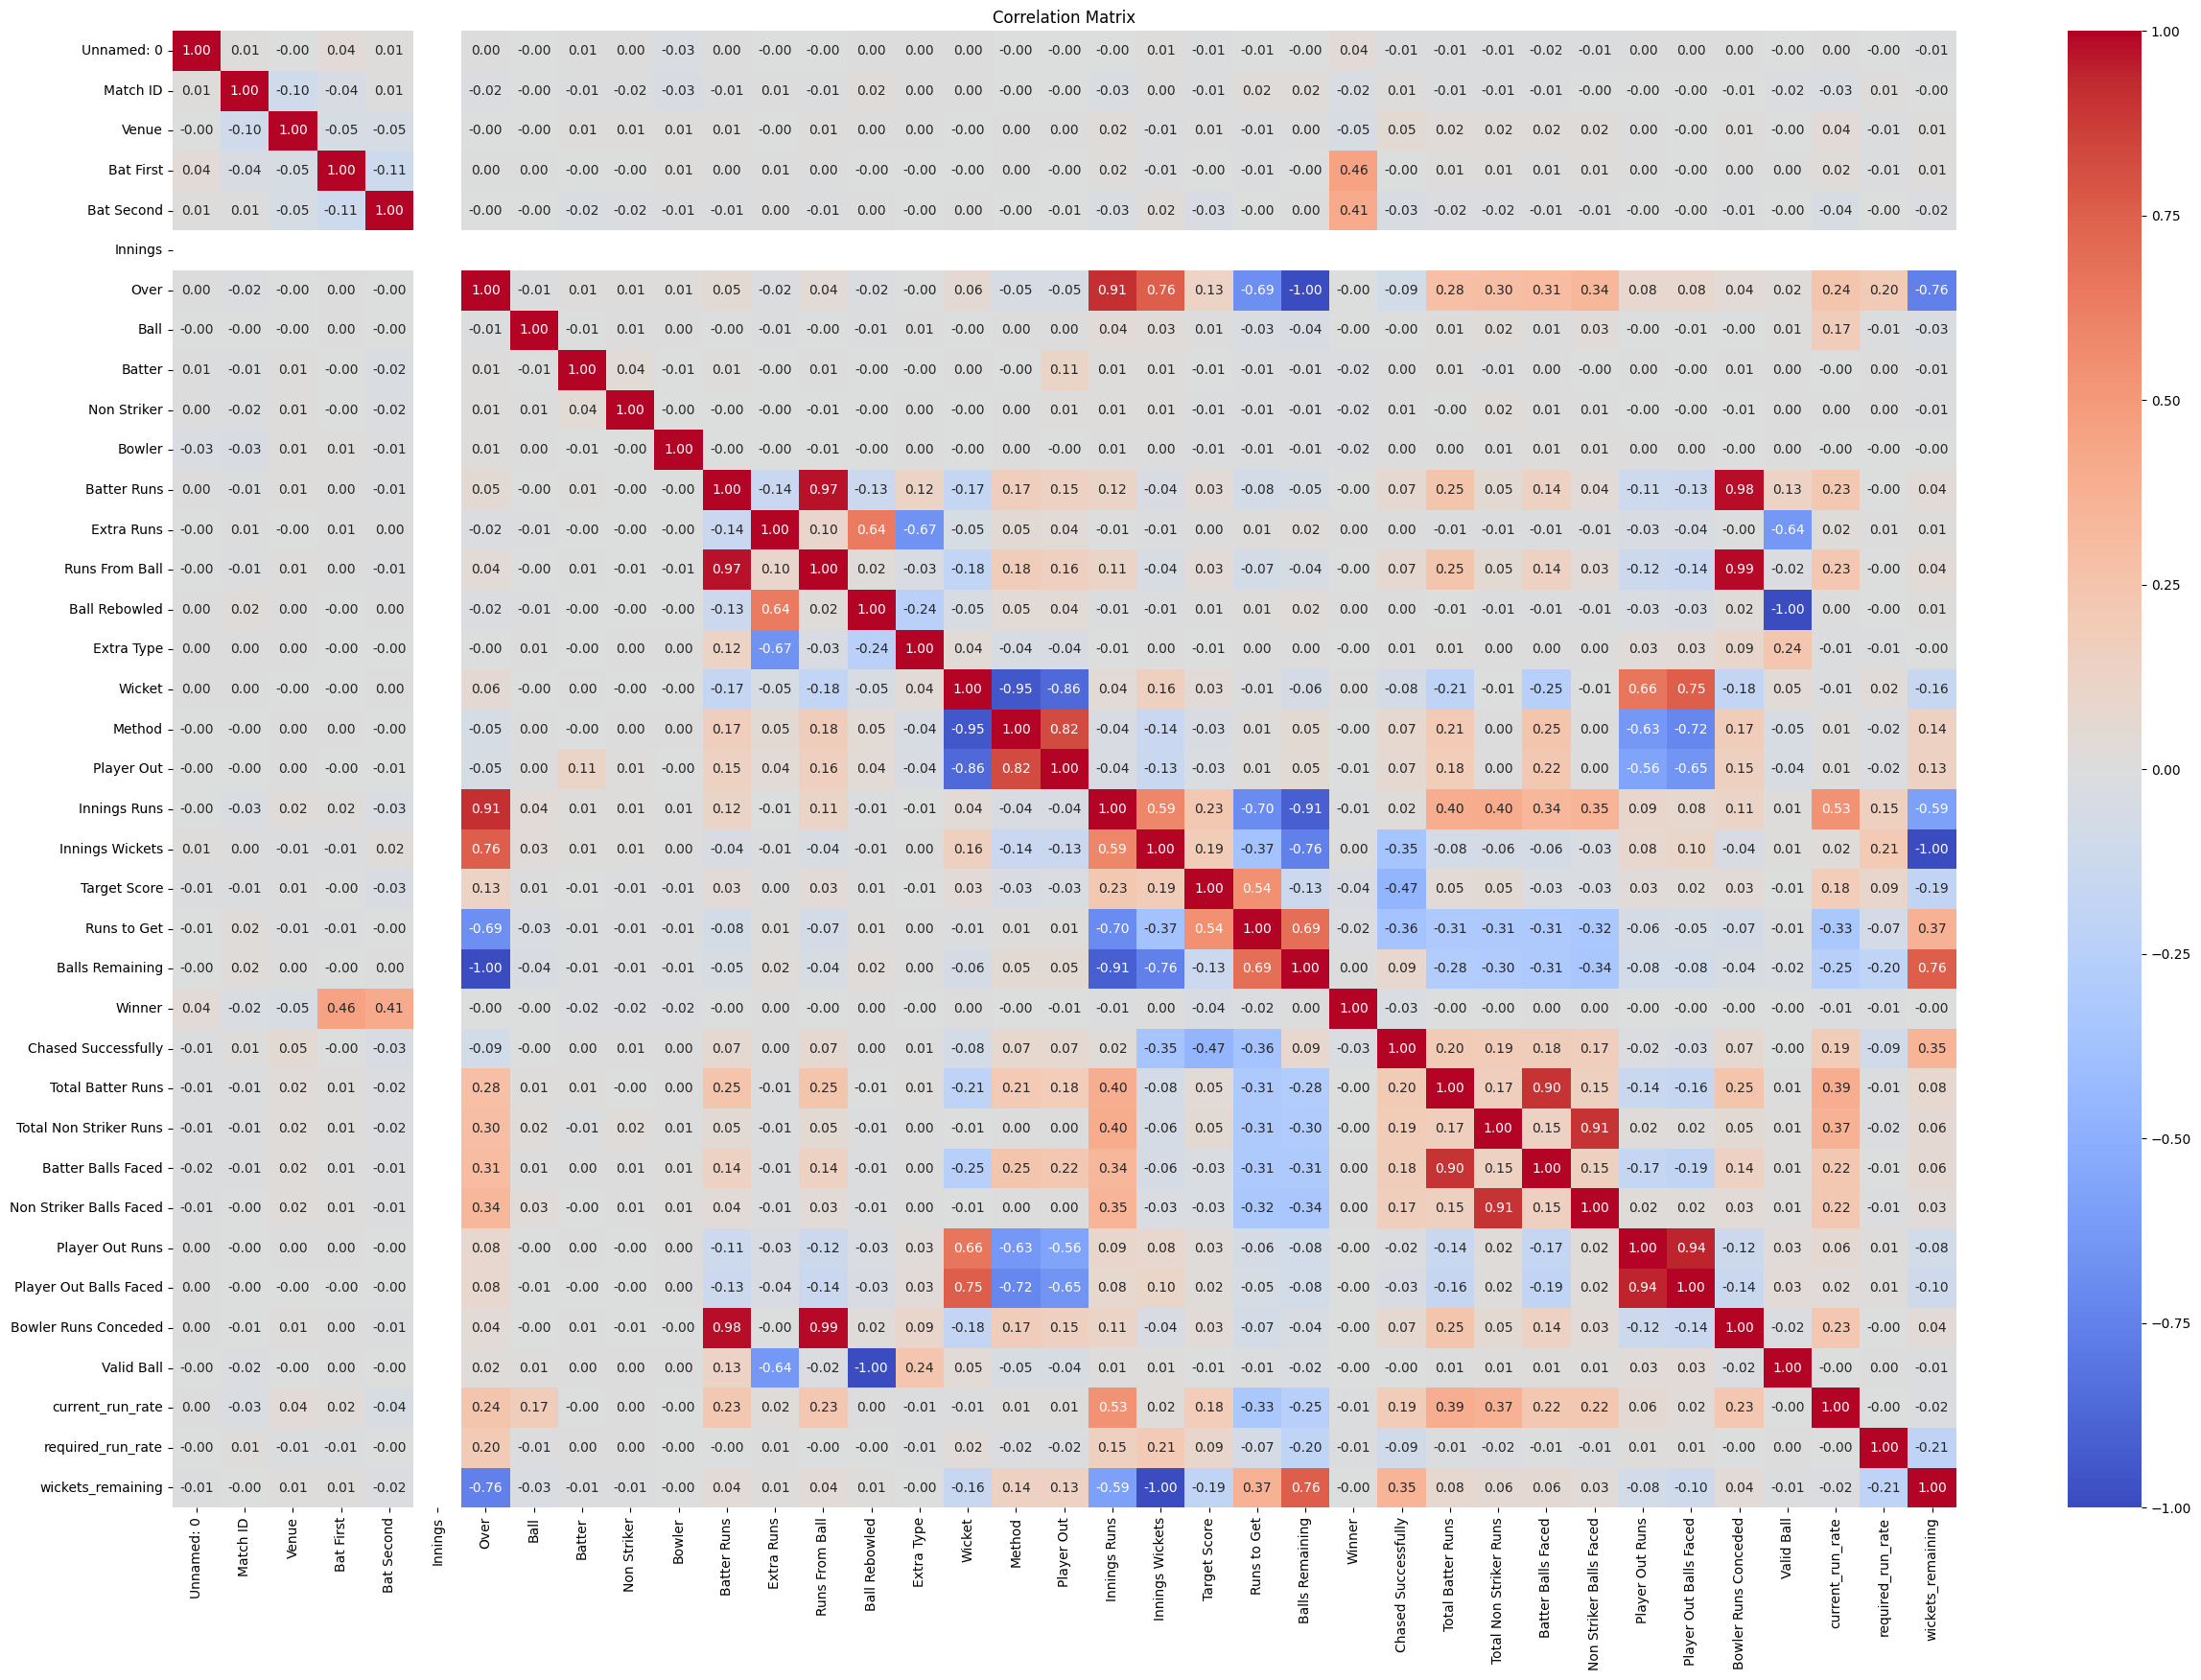

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

file_path = 'encoded_second_inning_data.csv'
data = pd.read_csv(file_path)

correlation_matrix = data.corr()

# Visualization with a heatmap
plt.figure(figsize=(30, 20))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix")
plt.show()


C:\Users\dell\AppData\Local\Temp\ipykernel_13168\484074741.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  run_rate_success = data.groupby('run_rate_bin')['Chased Successfully'].mean()


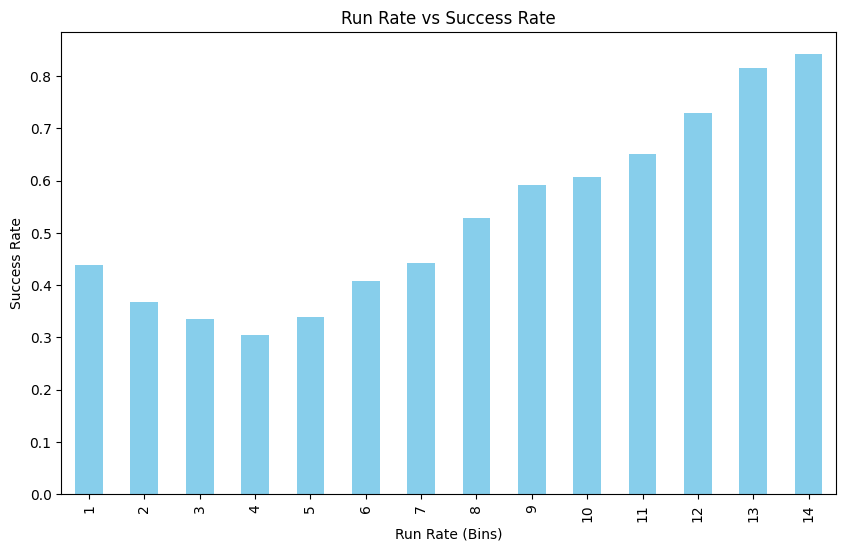

In [ ]:
# Create run rate bins
data['run_rate_bin'] = pd.cut(data['current_run_rate'], bins=range(0, 15, 1), labels=range(1, 15))

# Calculate success rate for each bin
run_rate_success = data.groupby('run_rate_bin')['Chased Successfully'].mean()

# Plot the success rates
plt.figure(figsize=(10, 6))
run_rate_success.plot(kind='bar', color='skyblue')
plt.title("Run Rate vs Success Rate")
plt.xlabel("Run Rate (Bins)")
plt.ylabel("Success Rate")
plt.show()


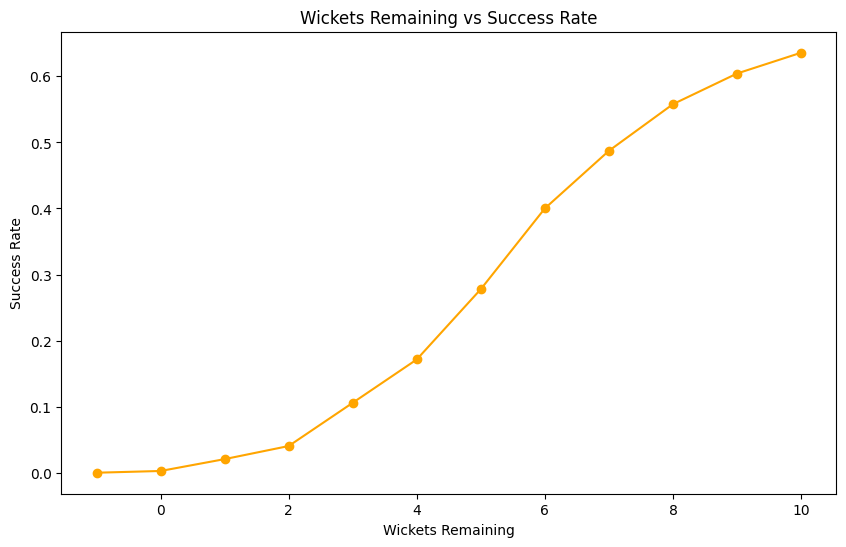

In [ ]:
# Group by wickets remaining
wickets_success = data.groupby('wickets_remaining')['Chased Successfully'].mean()

# Plot success rates
plt.figure(figsize=(10, 6))
wickets_success.plot(kind='line', marker='o', color='orange')
plt.title("Wickets Remaining vs Success Rate")
plt.xlabel("Wickets Remaining")
plt.ylabel("Success Rate")
plt.show()


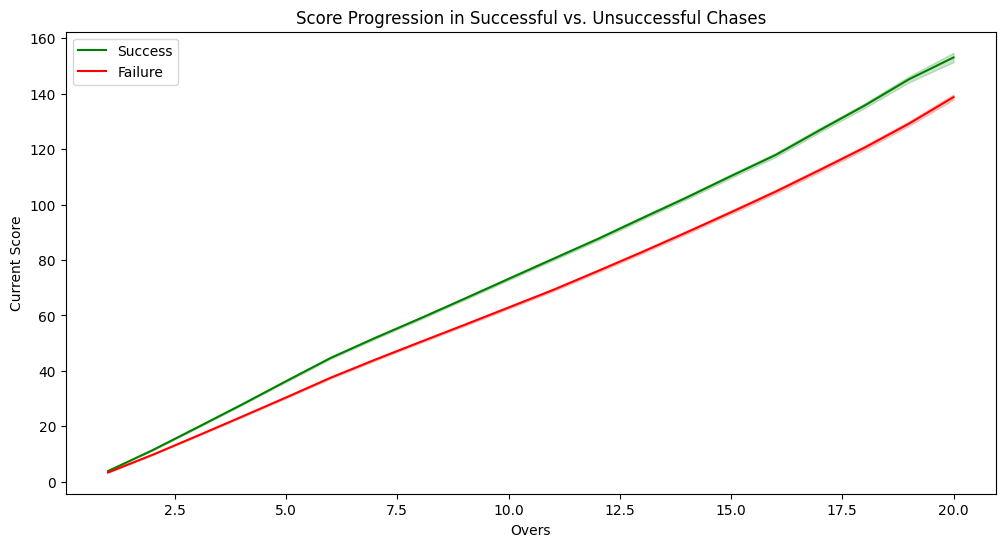

In [ ]:
# Filter data for success and failure
success_data = data[data['Chased Successfully'] == 1]
failure_data = data[data['Chased Successfully'] == 0]

# Plot score progression
plt.figure(figsize=(12, 6))
sns.lineplot(data=success_data, x='Over', y='Innings Runs', label='Success', color='green')
sns.lineplot(data=failure_data, x='Over', y='Innings Runs', label='Failure', color='red')
plt.title("Score Progression in Successful vs. Unsuccessful Chases")
plt.xlabel("Overs")
plt.ylabel("Current Score")
plt.legend()
plt.show()


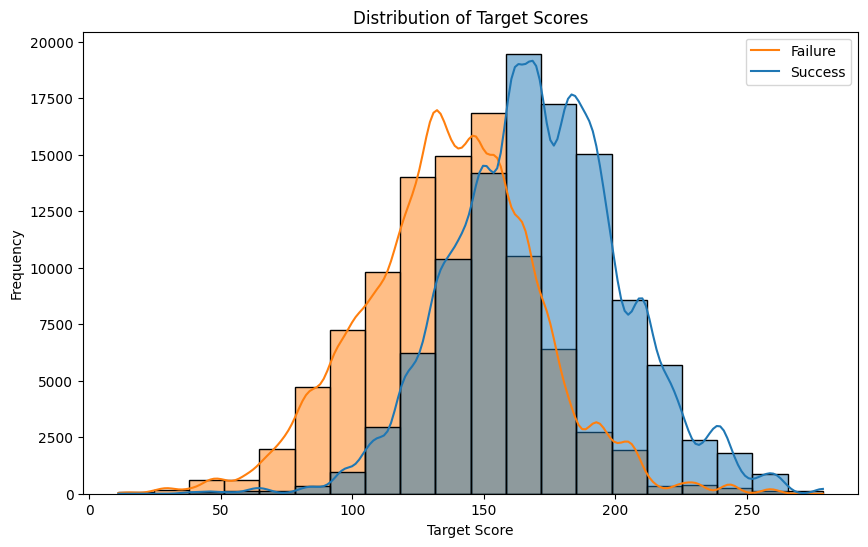

In [ ]:
# Plot distribution of target scores
plt.figure(figsize=(10, 6))
sns.histplot(data, x='Target Score', hue='Chased Successfully', kde=True, bins=20)
plt.title("Distribution of Target Scores")
plt.xlabel("Target Score")
plt.ylabel("Frequency")
plt.legend(["Failure", "Success"])
plt.show()


C:\Users\dell\AppData\Local\Temp\ipykernel_13168\4026065300.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  target_success_rate = data.groupby('target_range')['Chased Successfully'].mean()


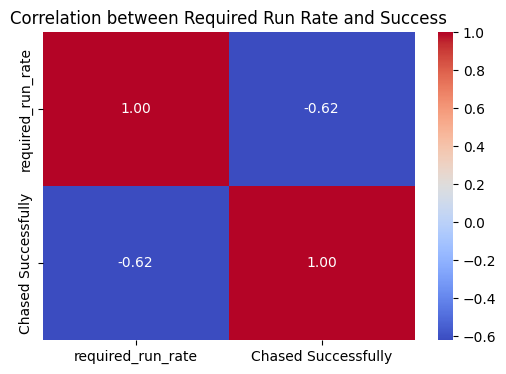

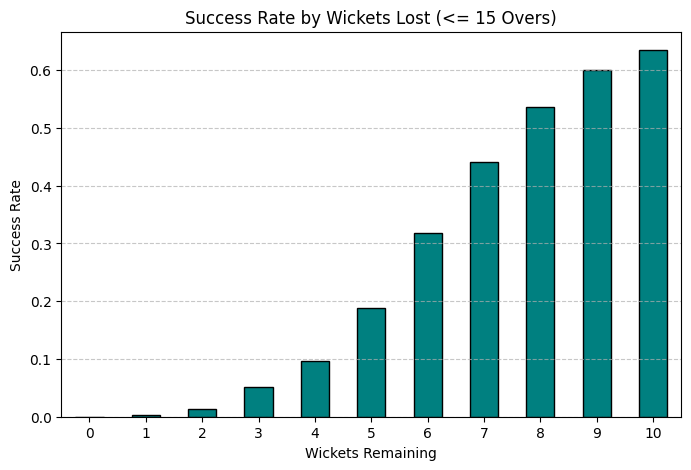

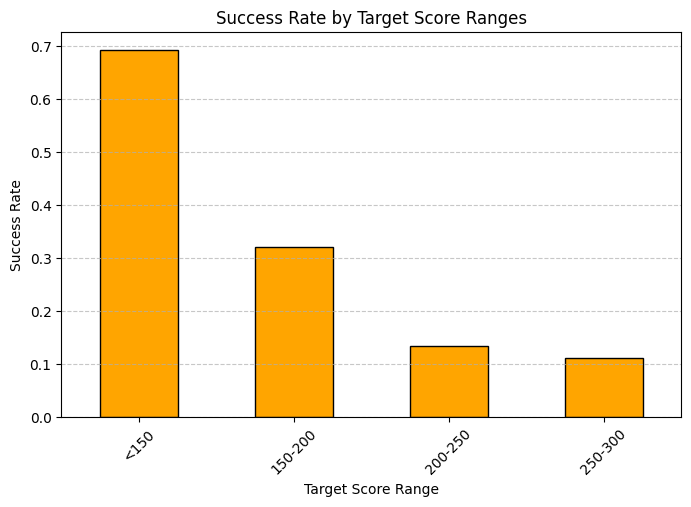

In [ ]:
# Correlation for required run rate after 10 overs
data_10_overs = data[data['Over'] == 10]
required_run_rate_correlation = data_10_overs[['required_run_rate', 'Chased Successfully']].corr()

# Success rate by wickets lost by the 15th over
data_15_overs = data[data['Over'] <= 15]
wickets_success_rate = data_15_overs.groupby('wickets_remaining')['Chased Successfully'].mean()

# Success rate by target score ranges
bins = [0, 150, 200, 250, 300]
labels = ['<150', '150-200', '200-250', '250-300']
data['target_range'] = pd.cut(data['Target Score'], bins=bins, labels=labels)
target_success_rate = data.groupby('target_range')['Chased Successfully'].mean()

# Plot 1: Correlation Heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(required_run_rate_correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation between Required Run Rate and Success")
plt.show()

# Plot 2: Success Rate by Wickets Lost
plt.figure(figsize=(8, 5))
wickets_success_rate.plot(kind='bar', color='teal', edgecolor='black')
plt.title("Success Rate by Wickets Lost (<= 15 Overs)")
plt.xlabel("Wickets Remaining")
plt.ylabel("Success Rate")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Plot 3: Success Rate by Target Ranges
plt.figure(figsize=(8, 5))
target_success_rate.plot(kind='bar', color='orange', edgecolor='black')
plt.title("Success Rate by Target Score Ranges")
plt.xlabel("Target Score Range")
plt.ylabel("Success Rate")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
import pandas as pd
import numpy as np
file_path = 'encoded_second_inning_data.csv'  # Assuming this is the cleaned dataset
data = pd.read_csv(file_path)
# print(data.head())
print(data.isnull().sum())  # This will show the count of NaN values in each column



Unnamed: 0                 0
Match ID                   0
Venue                      0
Bat First                  0
Bat Second                 0
Innings                    0
Over                       0
Ball                       0
Batter                     0
Non Striker                0
Bowler                     0
Batter Runs                0
Extra Runs                 0
Runs From Ball             0
Ball Rebowled              0
Extra Type                 0
Wicket                     0
Method                     0
Player Out                 0
Innings Runs               0
Innings Wickets            0
Target Score               0
Runs to Get                0
Balls Remaining            0
Winner                     0
Chased Successfully        0
Total Batter Runs          0
Total Non Striker Runs     0
Batter Balls Faced         0
Non Striker Balls Faced    0
Player Out Runs            0
Player Out Balls Faced     0
Bowler Runs Conceded       0
Valid Ball                 0
current_run_ra

In [ ]:
missing_counts = data.isnull().sum()
missing_counts = missing_counts[missing_counts > 0].sort_values(ascending=False)

print("Columns with missing values:\n")
print(missing_counts)


Columns with missing values:

Series([], dtype: int64)


In [ ]:
missing_values = data_numeric.isna().sum()
missing_values = missing_values[missing_values > 0]  # Only show columns with missing values
missing_values_sorted = missing_values.sort_values(ascending=False)

print(missing_values_sorted)


data_numeric = data_cleaned.select_dtypes(include=[np.number])
missing_percentage = (data_numeric.isna().sum() / len(data_numeric)) * 100
missing_percentage = missing_percentage[missing_percentage > 0].sort_values(ascending=False)

print(missing_percentage)



In [ ]:
data_filled = data.copy()
numeric_cols = data.select_dtypes(include=[np.number]).columns
data_filled[numeric_cols] = data_filled[numeric_cols].fillna(data_filled[numeric_cols].mean())


In [ ]:
data.columns

Index(['Unnamed: 0', 'Match ID', 'Venue', 'Bat First', 'Bat Second', 'Innings',
       'Over', 'Ball', 'Batter', 'Non Striker', 'Bowler', 'Batter Runs',
       'Extra Runs', 'Runs From Ball', 'Ball Rebowled', 'Extra Type', 'Wicket',
       'Method', 'Player Out', 'Innings Runs', 'Innings Wickets',
       'Target Score', 'Runs to Get', 'Balls Remaining', 'Winner',
       'Chased Successfully', 'Total Batter Runs', 'Total Non Striker Runs',
       'Batter Balls Faced', 'Non Striker Balls Faced', 'Player Out Runs',
       'Player Out Balls Faced', 'Bowler Runs Conceded', 'Valid Ball',
       'current_run_rate', 'required_run_rate', 'wickets_remaining'],
      dtype='object')

In [ ]:
# Backup Match ID before dropping it
match_ids = data['Match ID']  # <-- Save Match ID

# Drop unwanted columns
cols_to_drop = [
    'Unnamed: 0', 'Match ID', 'Venue', 'Bat First', 'Bat Second',
    'Batter', 'Non Striker', 'Bowler', 'Player Out', 'Winner',
    'Player Out Runs', 'Player Out Balls Faced', 'Method'
]
data_cleaned = data.drop(columns=cols_to_drop)

# Fill missing values
data_cleaned = data_cleaned.fillna(data_cleaned.mean(numeric_only=True))

# Separate features and target
X = data_cleaned.drop(columns=['Chased Successfully'])
y = data_cleaned['Chased Successfully']

# Split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test, match_ids_train, match_ids_test = train_test_split(
    X, y, match_ids, test_size=0.2, random_state=42
)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

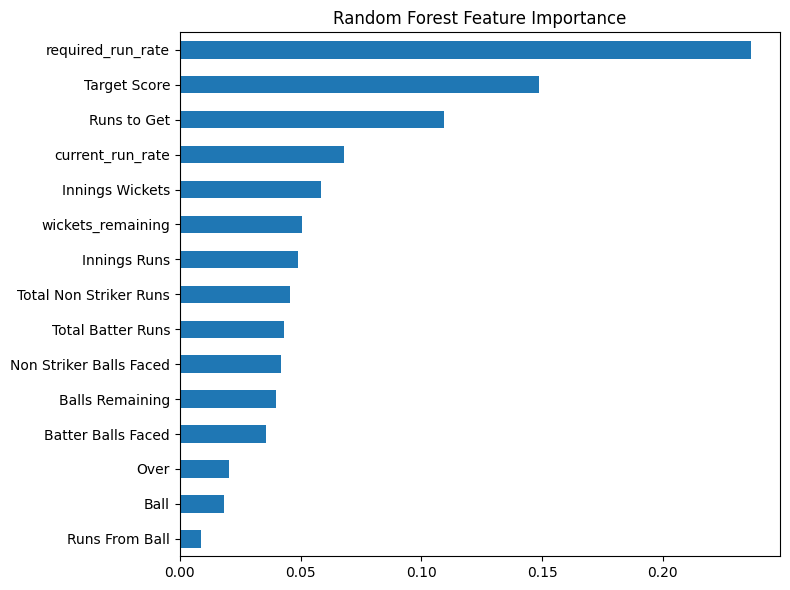

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

importances = rf.feature_importances_
feature_names = X_train.columns
forest_importance = pd.Series(importances, index=feature_names).sort_values(ascending=False)

# Plot top 15
forest_importance.head(15).plot(kind='barh', figsize=(8, 6))
plt.title("Random Forest Feature Importance")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


In [ ]:
important_features = [
    'required_run_rate', 'Target Score', 'Runs to Get', 'current_run_rate', 'Innings Wickets', 'wickets_remaining', 'Innings Runs' ,'Total Non Striker Runs', 'Total Batter Runs', 'Non Striker Balls Faced', 'Balls Remaining','Batter Balls Faced'

]


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import joblib


X = data_cleaned[important_features]
y = data_cleaned['Chased Successfully']

# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestClassifier(
    n_estimators=100,      # Require more samples to split
    random_state=42
)
model.fit(X_train, y_train)


# Saving the trained model
joblib.dump(model, 'random_forest_model.pkl')


['random_forest_model.pkl']

In [ ]:
# Predict win probabilities
win_probabilities = model.predict_proba(X_test)[:, 1] * 100  # Convert to %

# Predict binary labels
y_pred = model.predict(X_test)
 
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2%}")

# Optional: classification report
print(classification_report(y_test, y_pred))


Accuracy: 92.98%
              precision    recall  f1-score   support

           0       0.94      0.93      0.93     21444
           1       0.92      0.93      0.92     18617

    accuracy                           0.93     40061
   macro avg       0.93      0.93      0.93     40061
weighted avg       0.93      0.93      0.93     40061



In [ ]:
for i in range(5):
    print(f"Match {i+1}: Win Probability = {win_probabilities[i]:.2f}%, Actual = {y_test.iloc[i]}")


Match 1: Win Probability = 65.00%, Actual = 1
Match 2: Win Probability = 0.00%, Actual = 0
Match 3: Win Probability = 83.00%, Actual = 1
Match 4: Win Probability = 91.00%, Actual = 1
Match 5: Win Probability = 4.00%, Actual = 0


In [ ]:
probs = model.predict_proba(X_test)

for i in range(5):
    lose_prob = probs[i][0] * 100
    win_prob = probs[i][1] * 100
    actual = y_test.iloc[i]
    print(f"Match {i+1}: Win = {win_prob:.2f}%, Lose = {lose_prob:.2f}%, Actual = {actual}")


Match 1: Win = 65.00%, Lose = 35.00%, Actual = 1
Match 2: Win = 0.00%, Lose = 100.00%, Actual = 0
Match 3: Win = 83.00%, Lose = 17.00%, Actual = 1
Match 4: Win = 91.00%, Lose = 9.00%, Actual = 1
Match 5: Win = 4.00%, Lose = 96.00%, Actual = 0


In [ ]:
# Get probabilities for each ball
probs = model.predict_proba(X_test)

# Separate them
lose_probs = probs[:, 0] * 100  # Class 0 = Lose
win_probs = probs[:, 1] * 100   # Class 1 = Win


In [ ]:
results_df = X_test.copy()
results_df['Win Probability (%)'] = win_probs
results_df['Lose Probability (%)'] = lose_probs
results_df['Actual Outcome'] = y_test.values  # 1 = Win, 0 = Loss
results_df['Match ID'] = match_ids_test.values  # ← Add Match ID back

In [ ]:
# Save to CSV
results_df.to_csv("ball_by_ball_probabilities.csv", index=False)


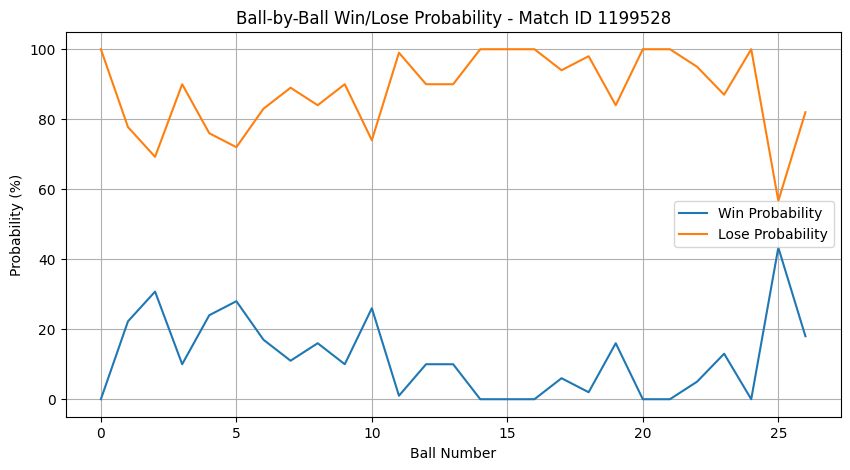

In [ ]:
match_id = 1199528
match_df = results_df[results_df['Match ID'] == match_id]

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(match_df['Win Probability (%)'].values, label='Win Probability')
plt.plot(match_df['Lose Probability (%)'].values, label='Lose Probability')
plt.title(f'Ball-by-Ball Win/Lose Probability - Match ID {match_id}')
plt.xlabel("Ball Number")
plt.ylabel("Probability (%)")
plt.legend()
plt.grid(True)
plt.show()


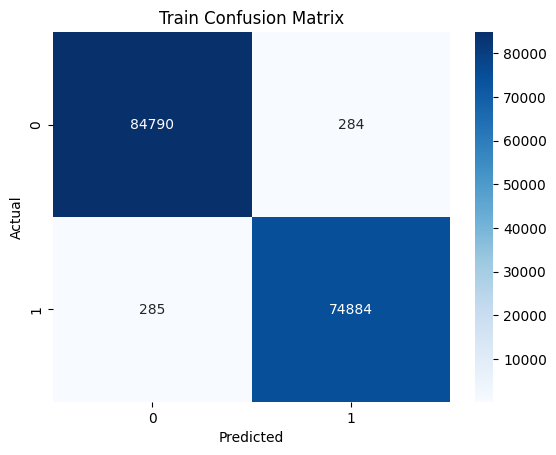

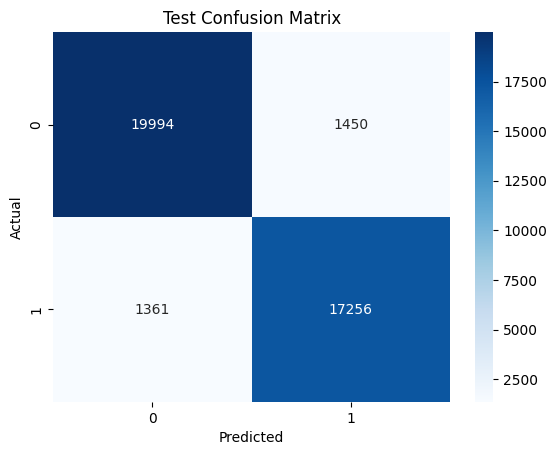

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_conf_matrix(y_true, y_pred, title="Confusion Matrix"):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Plot for training data
plot_conf_matrix(y_train, train_preds, "Train Confusion Matrix")

# Plot for test data
plot_conf_matrix(y_test, test_preds, "Test Confusion Matrix")


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import r2_score

# Predict on training and test sets
train_preds = model.predict(X_train)
test_preds = model.predict(X_test)

# Evaluate metrics
def evaluate_model(true, pred, dataset="Train"):
    print(f"\n📊 {dataset} Metrics:")
    print(f"✅ Accuracy:  {accuracy_score(true, pred):.4f}")
    print(f"🎯 Precision: {precision_score(true, pred):.4f}")
    print(f"🔁 Recall:    {recall_score(true, pred):.4f}")
    print(f"📏 F1 Score:  {f1_score(true, pred):.4f}")
    print(f"R2 Score: {r2_score(true,pred):.4f}")


evaluate_model(y_train, train_preds, "Train")
evaluate_model(y_test, test_preds, "Test")



📊 Train Metrics:
✅ Accuracy:  0.9964
🎯 Precision: 0.9962
🔁 Recall:    0.9962
📏 F1 Score:  0.9962
R2 Score: 0.9857

📊 Test Metrics:
✅ Accuracy:  0.9298
🎯 Precision: 0.9225
🔁 Recall:    0.9269
📏 F1 Score:  0.9247
R2 Score: 0.7179


In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, r2_score

# Instantiate and train the model
xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

import joblib

# Save the trained model
joblib.dump(xgb_model, 'xgb_model.pkl')



c:\Users\dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [00:43:50] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


['xgb_model.pkl']

In [ ]:
train_preds_xgb = xgb_model.predict(X_train)
test_preds_xgb = xgb_model.predict(X_test)
xgb_model = joblib.load('xgb_model.pkl')

# If you want probabilities (for R2 or calibration plots)
train_probs_xgb = xgb_model.predict_proba(X_train)[:, 1]
test_probs_xgb = xgb_model.predict_proba(X_test)[:, 1]


In [ ]:
def evaluate_model(true, pred, probs, dataset="Set"):
    print(f"\n📊 {dataset} Metrics:")
    print(f"✅ Accuracy:  {accuracy_score(true, pred):.4f}")
    print(f"🎯 Precision: {precision_score(true, pred):.4f}")
    print(f"🔁 Recall:    {recall_score(true, pred):.4f}")
    print(f"📏 F1 Score:  {f1_score(true, pred):.4f}")
    print(f"🎯 R2 Score:  {r2_score(true, probs):.4f}")

evaluate_model(y_train, train_preds_xgb, train_probs_xgb, "Train")
evaluate_model(y_test, test_preds_xgb, test_probs_xgb, "Test")



📊 Train Metrics:
✅ Accuracy:  0.8454
🎯 Precision: 0.8323
🔁 Recall:    0.8396
📏 F1 Score:  0.8359
🎯 R2 Score:  0.5740

📊 Test Metrics:
✅ Accuracy:  0.8417
🎯 Precision: 0.8250
🔁 Recall:    0.8369
📏 F1 Score:  0.8309
🎯 R2 Score:  0.5650


In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV


In [ ]:
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}


In [ ]:
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

grid_search = GridSearchCV(estimator=xgb,
                           param_grid=param_grid,
                           cv=3,  # 3-fold cross-validation
                           scoring='f1',  # You can also use 'roc_auc'
                           verbose=1,
                           n_jobs=-1)  # Use all cores

grid_search.fit(X_train, y_train)

import joblib

# Save the trained model
joblib.dump(grid_search, 'XGBClassifier_model.pkl')


Fitting 3 folds for each of 108 candidates, totalling 324 fits


c:\Users\dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [00:53:07] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


['XGBClassifier_model.pkl']

In [ ]:
grid_search = joblib.load('XGBClassifier_model.pkl')

print("🔧 Best Parameters:", grid_search.best_params_)

# Evaluate best model on test set
best_model = grid_search.best_estimator_

test_preds = best_model.predict(X_test)
test_probs = best_model.predict_proba(X_test)[:, 1]

from sklearn.metrics import classification_report, r2_score

print("\n📊 Classification Report:")
print(classification_report(y_test, test_preds))

print(f"🎯 R2 Score: {r2_score(y_test, test_probs):.4f}")


🔧 Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 150, 'subsample': 0.8}

📊 Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.89      0.89     21444
           1       0.87      0.88      0.88     18617

    accuracy                           0.89     40061
   macro avg       0.89      0.89      0.89     40061
weighted avg       0.89      0.89      0.89     40061

🎯 R2 Score: 0.6797


In [ ]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, r2_score
)


# Evaluate function
def evaluate_model(true, pred, dataset="Dataset"):
    print(f"\n📊 {dataset} Metrics:")
    print(f"✅ Accuracy:  {accuracy_score(true, pred):.4f}")
    print(f"🎯 Precision: {precision_score(true, pred):.4f}")
    print(f"🔁 Recall:    {recall_score(true, pred):.4f}")
    print(f"📏 F1 Score:  {f1_score(true, pred):.4f}")
    print(f"📐 R2 Score:  {r2_score(true, pred):.4f}")

evaluate_model(y_train, train_preds, "Train")
evaluate_model(y_test, test_preds, "Test")



📊 Train Metrics:
✅ Accuracy:  0.9964
🎯 Precision: 0.9962
🔁 Recall:    0.9962
📏 F1 Score:  0.9962
📐 R2 Score:  0.9857

📊 Test Metrics:
✅ Accuracy:  0.8865
🎯 Precision: 0.8739
🔁 Recall:    0.8833
📏 F1 Score:  0.8786
📐 R2 Score:  0.5439


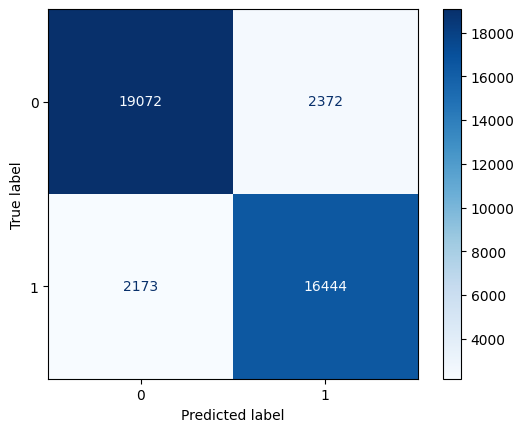

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predict on test set
test_preds = best_model.predict(X_test)

# Generate and display confusion matrix
cm = confusion_matrix(y_test, test_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot(cmap='Blues')


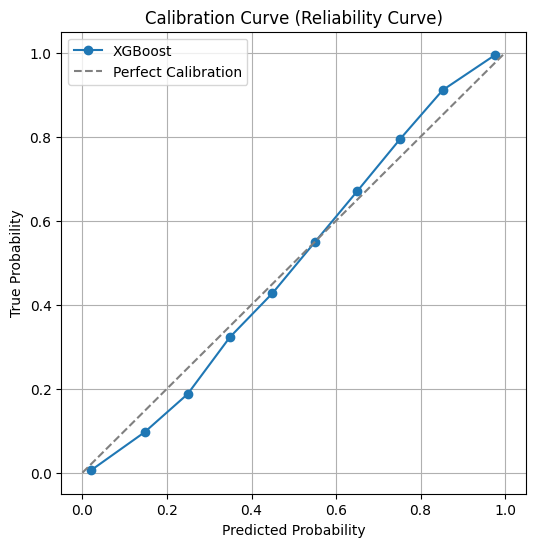

In [ ]:
from sklearn.calibration import calibration_curve
import matplotlib.pyplot as plt

# Predict probabilities for the positive class
test_probs = best_model.predict_proba(X_test)[:, 1]

# Calculate calibration curve
prob_true, prob_pred = calibration_curve(y_test, test_probs, n_bins=10)

# Plot calibration curve
plt.figure(figsize=(6, 6))
plt.plot(prob_pred, prob_true, marker='o', label='XGBoost')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Perfect Calibration')
plt.xlabel('Predicted Probability')
plt.ylabel('True Probability')
plt.title('Calibration Curve (Reliability Curve)')
plt.legend()
plt.grid(True)
plt.show()


In [97]:
from sklearn.linear_model import LogisticRegression

log_reg_model = LogisticRegression(max_iter=3000, random_state=42)
log_reg_model.fit(X_train, y_train)

import joblib

# Save the trained model
joblib.dump(log_reg_model, 'log_reg_model.pkl')

train_preds = log_reg_model.predict(X_train)
test_preds = log_reg_model.predict(X_test)

# For win probabilities:
train_probs = log_reg_model.predict_proba(X_train)[:, 1]
test_probs = log_reg_model.predict_proba(X_test)[:, 1]


evaluate_model(y_train, train_preds, "Train")
evaluate_model(y_test, test_preds, "Test")

from sklearn.metrics import r2_score

print("R2 Score (Train):", r2_score(y_train, train_probs))
print("R2 Score (Test):", r2_score(y_test, test_probs))




📊 Train Metrics:
✅ Accuracy:  0.8184
🎯 Precision: 0.8081
🔁 Recall:    0.8038
📏 F1 Score:  0.8059
📐 R2 Score:  0.2709

📊 Test Metrics:
✅ Accuracy:  0.8191
🎯 Precision: 0.8059
🔁 Recall:    0.8045
📏 F1 Score:  0.8052
📐 R2 Score:  0.2728
R2 Score (Train): 0.4885181327394502
R2 Score (Test): 0.4880494032755336


In [6]:
import numpy as np
import joblib  # or pickle depending on your model
import math

# Load your trained model
model = joblib.load('random_forest_model.pkl')  # Update with your actual model path

# Take minimal input
target_score = int(input("Enter Target Score: "))
current_score = int(input("Enter Current Score: "))
wickets_fallen = int(input("Enter Wickets Fallen: "))
overs_completed = int(input("Enter Overs Completed (integer part): "))
balls_this_over = int(input("Enter Current Ball in Over (0-5): "))

# Optional inputs
try:
    batter_runs = int(input("Enter Batter Runs (or leave blank): ") or 0)
    non_striker_runs = int(input("Enter Non-Striker Runs (or leave blank): ") or 0)
    batter_balls = int(input("Enter Batter Balls Faced (or leave blank): ") or 1)
    non_striker_balls = int(input("Enter Non-Striker Balls Faced (or leave blank): ") or 1)
except ValueError:
    batter_runs = non_striker_runs = 0
    batter_balls = non_striker_balls = 1

# Derived features
total_balls_bowled = overs_completed * 6 + balls_this_over
balls_remaining = 120 - total_balls_bowled
runs_to_get = target_score - current_score

current_run_rate = current_score / (total_balls_bowled / 6) if total_balls_bowled != 0 else 0
required_run_rate = runs_to_get / (balls_remaining / 6) if balls_remaining != 0 else 0
wickets_remaining = 10 - wickets_fallen

# Create feature vector based on your model’s expected features
# Adjust the order as per your training
features = pd.DataFrame([{
    "required_run_rate": required_run_rate,
    "Target Score": target_score,
    "Runs to Get": runs_to_get,
    "current_run_rate": current_run_rate,
    "Innings Wickets": wickets_fallen,
    "wickets_remaining": wickets_remaining,
    "Innings Runs": current_score,
    "Total Non Striker Runs": non_striker_runs,
    "Total Batter Runs": batter_runs,
    "Non Striker Balls Faced": non_striker_balls,
    "Balls Remaining": balls_remaining,
    "Batter Balls Faced": batter_balls
}])
'required_run_rate', 'Target Score', 'Runs to Get', 'current_run_rate', 'Innings Wickets', 'wickets_remaining', 'Innings Runs' ,'Total Non Striker Runs', 'Total Batter Runs', 'Non Striker Balls Faced', 'Balls Remaining','Batter Balls Faced'
# Predict probabilities
prob = model.predict_proba(features)[0]
win_prob = prob[1] * 100
lose_prob = prob[0] * 100

# Output
print(f"\n🟢 Win Probability: {win_prob:.2f}%")
print(f"🔴 Lose Probability: {lose_prob:.2f}%")



🟢 Win Probability: 13.00%
🔴 Lose Probability: 87.00%


In [ ]:
import tkinter as tk
from tkinter import messagebox
import pandas as pd
import joblib

# Load model
model = joblib.load('random_forest_model.pkl')

def predict_win_probability():
    try:
        # Basic inputs
        target_score = int(entry_target_score.get())
        current_score = int(entry_current_score.get())
        wickets_fallen = int(entry_wickets.get())
        overs_completed = int(entry_overs.get())
        balls_this_over = int(entry_balls.get())

        # Optional inputs
        batter_runs = int(entry_batter_runs.get() or 0)
        non_striker_runs = int(entry_non_striker_runs.get() or 0)
        batter_balls = int(entry_batter_balls.get() or 1)
        non_striker_balls = int(entry_non_striker_balls.get() or 1)

        # Derived features
        total_balls_bowled = overs_completed * 6 + balls_this_over
        balls_remaining = 120 - total_balls_bowled
        runs_to_get = target_score - current_score
        wickets_remaining = 10 - wickets_fallen

        # --- Pre-check for match already won ---
        if current_score >= target_score:
            result_label.config(
                text="✅ Match Already Won!\nNo prediction needed.",
                fg="#00FF00"
            )
            return

        # Optional: Match lost due to no balls/wickets
        if (balls_remaining <= 0 or wickets_fallen >= 10) and current_score < target_score:
            result_label.config(
                text="❌ Match Lost.\nNo prediction applicable.",
                fg="#FF4C4C"
            )
            return

        # Continue with probability calculation
        current_run_rate = current_score / (total_balls_bowled / 6) if total_balls_bowled else 0
        required_run_rate = runs_to_get / (balls_remaining / 6) if balls_remaining else 0

        features = pd.DataFrame([{
            "required_run_rate": required_run_rate,
            "Target Score": target_score,
            "Runs to Get": runs_to_get,
            "current_run_rate": current_run_rate,
            "Innings Wickets": wickets_fallen,
            "wickets_remaining": wickets_remaining,
            "Innings Runs": current_score,
            "Total Non Striker Runs": non_striker_runs,
            "Total Batter Runs": batter_runs,
            "Non Striker Balls Faced": non_striker_balls,
            "Balls Remaining": balls_remaining,
            "Batter Balls Faced": batter_balls
        }])

        prob = model.predict_proba(features)[0]
        win_prob = prob[1] * 100
        lose_prob = prob[0] * 100

        result_label.config(
            text=f"🟢 Win Probability: {win_prob:.2f}%\n🔴 Lose Probability: {lose_prob:.2f}%",
            fg="#00FFB3"
        )

    except Exception as e:
        messagebox.showerror("Input Error", f"Please enter valid numeric inputs.\n\nDetails: {e}")


# --- GUI Setup ---
root = tk.Tk()
root.title("Cricket Match Win Probability Predictor")
root.geometry("600x700")
root.configure(bg="#1e1e1e")
root.resizable(False, False)

# Fonts
FONT_LABEL = ("Segoe UI", 12)
FONT_ENTRY = ("Segoe UI", 12)
FONT_BUTTON = ("Segoe UI", 12, "bold")
FONT_RESULT = ("Segoe UI", 15, "bold")
LABEL_COLOR = "#FFFFFF"

# Entry field generator
def add_input(label_text, row):
    tk.Label(frame, text=label_text, font=FONT_LABEL, fg=LABEL_COLOR, bg="#1e1e1e").grid(row=row, column=0, sticky='w', pady=6)
    entry = tk.Entry(frame, font=FONT_ENTRY, width=25, bg="#2e2e2e", fg="#ffffff", insertbackground='white', relief="flat")
    entry.grid(row=row, column=1, pady=6, padx=10)
    return entry

# Frame
frame = tk.Frame(root, padx=30, pady=30, bg="#1e1e1e")
frame.pack(expand=True)

# Section title
tk.Label(frame, text="📊 Match Input", font=("Segoe UI", 14, "bold"), fg="#00FFB3", bg="#1e1e1e", pady=10).grid(row=0, column=0, columnspan=2)

# Input fields
entry_target_score = add_input("🎯 Target Score", 1)
entry_current_score = add_input("🏏 Current Score", 2)
entry_wickets = add_input("💥 Wickets Fallen", 3)
entry_overs = add_input("⏱ Overs Completed", 4)
entry_balls = add_input("⚾ Balls in Over (0–5)", 5)

# Optional Inputs Section
tk.Label(frame, text="👥 Batter Info (Optional)", font=("Segoe UI", 14, "bold"), fg="#00FFB3", bg="#1e1e1e", pady=10).grid(row=6, column=0, columnspan=2)

entry_batter_runs = add_input("🧍‍♂️ Batter Runs", 7)
entry_non_striker_runs = add_input("🧍‍♂️ Non-Striker Runs", 8)
entry_batter_balls = add_input("🔢 Batter Balls Faced", 9)
entry_non_striker_balls = add_input("🔢 Non-Striker Balls Faced", 10)

# Predict button with hover effect
def on_enter(e): predict_button.config(bg="#00CC99")
def on_leave(e): predict_button.config(bg="#00B386")

predict_button = tk.Button(frame, text="Predict", command=predict_win_probability,
                           bg="#00B386", fg="white", font=FONT_BUTTON,
                           activebackground="#00CC99", relief="flat", height=2, width=20)
predict_button.grid(row=11, column=0, columnspan=2, pady=25)
predict_button.bind("<Enter>", on_enter)
predict_button.bind("<Leave>", on_leave)

# Result label
result_label = tk.Label(frame, text="", font=FONT_RESULT, bg="#1e1e1e", justify="center")
result_label.grid(row=12, column=0, columnspan=2, pady=20)

root.mainloop()
